In [3]:
# import some necessary librairies

import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
plt.style.use('fivethirtyeight') 
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.linear_model import Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
xgb.set_config(verbosity=0)
import lightgbm as lgb


pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [4]:
# load data into dataframe 
df = pd.read_csv("C:/Users/Mudit/Desktop/Capstone/hyderabad_listings.csv")
df.head()

,Rooms,Bathrooms,SquareFeet,Age,Total floor,Floor,Lift,Deposit,Negotiability,Maintenance,Longitude,latitude,Gym,Furnishing,Parking,Direction,Locality,Rent
0,2.000,2.000,1400.000,10.000,2.000,0.000,False,30000.000,True,False,78.554,17.430,False,Semi,BOTH,East,Nacharam,15000.000
1,2.000,2.000,800.000,1.000,3.000,2.000,False,11500.000,True,False,78.545,17.482,False,Semi,BOTH,North,"Vayupuri, Sainikpuri",11500.000
2,2.000,2.000,1050.000,10.000,5.000,5.000,True,36000.000,True,True,78.468,17.504,False,Semi,BOTH,East,"suchitra ,quthbullapur main road",18000.000
3,3.000,3.000,2358.000,1.000,9.000,6.000,True,100000.000,True,False,78.339,17.397,True,Semi,TWO_WHEELER,South-East,Kokapet,30000.000
4,2.000,2.000,1200.000,3.000,5.000,4.000,True,31000.000,True,True,78.347,17.515,False,Semi,FOUR_WHEELER,North-East,Sai Nilayam Street Number 4,15500.000


In [5]:
# checking for duplicates 
print("There are {} duplicate values.".format(df.duplicated().sum()))
df[df.duplicated(keep=False)].head(10)

There are 732937 duplicate values.


,Rooms,Bathrooms,SquareFeet,Age,Total floor,Floor,Lift,Deposit,Negotiability,Maintenance,Longitude,latitude,Gym,Furnishing,Parking,Direction,Locality,Rent
0,2.000,2.000,1400.000,10.000,2.000,0.000,False,30000.000,True,False,78.554,17.430,False,Semi,BOTH,East,Nacharam,15000.000
1,2.000,2.000,800.000,1.000,3.000,2.000,False,11500.000,True,False,78.545,17.482,False,Semi,BOTH,North,"Vayupuri, Sainikpuri",11500.000
2,2.000,2.000,1050.000,10.000,5.000,5.000,True,36000.000,True,True,78.468,17.504,False,Semi,BOTH,East,"suchitra ,quthbullapur main road",18000.000
3,3.000,3.000,2358.000,1.000,9.000,6.000,True,100000.000,True,False,78.339,17.397,True,Semi,TWO_WHEELER,South-East,Kokapet,30000.000
4,2.000,2.000,1200.000,3.000,5.000,4.000,True,31000.000,True,True,78.347,17.515,False,Semi,FOUR_WHEELER,North-East,Sai Nilayam Street Number 4,15500.000
5,3.000,2.000,1200.000,10.000,4.000,4.000,True,40000.000,True,True,78.454,17.414,False,Semi,TWO_WHEELER,East,Khairtabad,20000.000
6,2.000,2.000,1100.000,5.000,4.000,4.000,True,25000.000,True,True,78.389,17.501,False,Semi,BOTH,East,Kukatpally,12500.000
7,2.000,2.000,1100.000,5.000,5.000,1.000,True,60000.000,True,True,78.388,17.400,False,Semi,BOTH,North,Puppalaguda,13500.000
8,3.000,3.000,1700.000,3.000,2.000,2.000,False,40000.000,True,True,78.392,17.448,False,Semi,BOTH,East,Madhapur,20000.000
9,3.000,3.000,1950.000,1.000,4.000,2.000,True,46000.000,True,True,78.418,17.517,False,Semi,BOTH,North,kukatpally,28000.000


In [6]:
# remove duplicate values
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [7]:
# check for duplicate values after removing duplicates
print("There are {} duplicate values.".format(df.duplicated().sum()))
df.head()

There are 0 duplicate values.


,Rooms,Bathrooms,SquareFeet,Age,Total floor,Floor,Lift,Deposit,Negotiability,Maintenance,Longitude,latitude,Gym,Furnishing,Parking,Direction,Locality,Rent
0,2.000,2.000,1400.000,10.000,2.000,0.000,False,30000.000,True,False,78.554,17.430,False,Semi,BOTH,East,Nacharam,15000.000
1,2.000,2.000,800.000,1.000,3.000,2.000,False,11500.000,True,False,78.545,17.482,False,Semi,BOTH,North,"Vayupuri, Sainikpuri",11500.000
2,2.000,2.000,1050.000,10.000,5.000,5.000,True,36000.000,True,True,78.468,17.504,False,Semi,BOTH,East,"suchitra ,quthbullapur main road",18000.000
3,3.000,3.000,2358.000,1.000,9.000,6.000,True,100000.000,True,False,78.339,17.397,True,Semi,TWO_WHEELER,South-East,Kokapet,30000.000
4,2.000,2.000,1200.000,3.000,5.000,4.000,True,31000.000,True,True,78.347,17.515,False,Semi,FOUR_WHEELER,North-East,Sai Nilayam Street Number 4,15500.000


In [8]:
# check for missing values
df.isnull().sum()

Rooms            1
Bathrooms        1
SquareFeet       1
Age              1
Total floor      1
Floor            1
Lift             1
Deposit          1
Negotiability    1
Maintenance      1
Longitude        1
latitude         1
Gym              1
Furnishing       1
Parking          1
Direction        0
Locality         1
Rent             1
dtype: int64

In [9]:
# dropping missing values since there is only 1 missing value per column
df = df.dropna()
df = df.reset_index(drop=True)

In [10]:
# check for missing values again
df.isnull().sum()

Rooms            0
Bathrooms        0
SquareFeet       0
Age              0
Total floor      0
Floor            0
Lift             0
Deposit          0
Negotiability    0
Maintenance      0
Longitude        0
latitude         0
Gym              0
Furnishing       0
Parking          0
Direction        0
Locality         0
Rent             0
dtype: int64

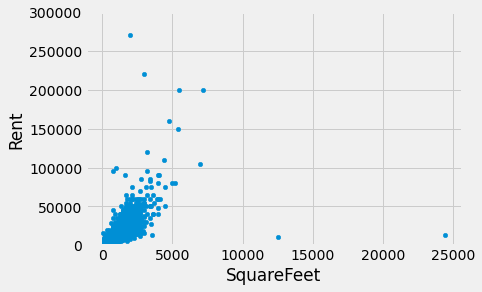

In [11]:
# bivariate analysis Rent/SquareFeet
var = 'SquareFeet'
data = pd.concat([df['Rent'], df[var]], axis=1)
data.plot.scatter(x=var, y='Rent', ylim=(0,300000));

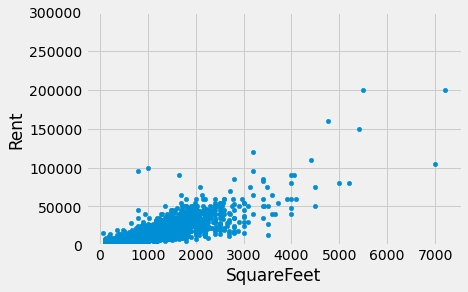

In [12]:
# deleting outliers
df = df.drop(df[(df['SquareFeet']>10000) & (df['Rent']<50000)].index)
df = df.drop(df[(df['SquareFeet']<4000) & (df['Rent']>200000)].index)

# check the graph again
var = 'SquareFeet'
data = pd.concat([df['Rent'], df[var]], axis=1)
data.plot.scatter(x=var, y='Rent', ylim=(0,300000));

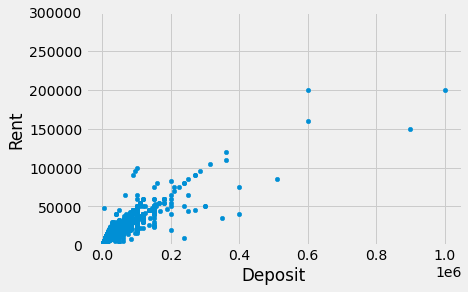

In [13]:
# bivariate analysis Rent/Deposit
var = 'Deposit'
data = pd.concat([df['Rent'], df[var]], axis=1)
data.plot.scatter(x=var, y='Rent', ylim=(0,300000));

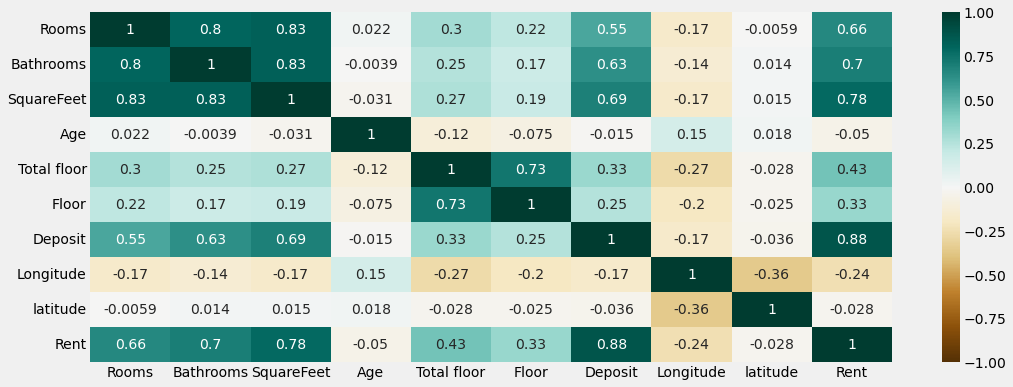

In [14]:
# plotting the correlation matrix
plt.figure(figsize=(16, 6))
correlation_mat=df.corr()
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
plt.show()

In [15]:
correlation_mat['Rent'].sort_values(ascending=False)[1:]

Deposit        0.881
SquareFeet     0.782
Bathrooms      0.697
Rooms          0.662
Total floor    0.435
Floor          0.331
latitude      -0.028
Age           -0.050
Longitude     -0.244
Name: Rent, dtype: float64

In [16]:
# dropping the columns that have very low correlation with Rent
df = df.drop(['Floor', 'latitude', 'Age', 'Longitude'], axis=1)
df.shape

(4165, 14)

In [17]:
from sklearn.preprocessing import LabelEncoder
cols = ('Furnishing', 'Parking')

# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

# shape        
print('Shape all_data: {}'.format(df.shape))

Shape all_data: (4165, 14)


In [18]:
numeric_feats = df.dtypes[df.dtypes != "object"].index

# check the skew of all numerical features
skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Deposit,8.743
Rent,4.351
Bathrooms,3.885
Total floor,3.822
SquareFeet,1.878
Parking,0.501
Rooms,0.208
Furnishing,-0.323


In [19]:
skewness = skewness[abs(skewness) > 0.75]
print(skewness)

# Box Cox Transformation of (highly) skewed features
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    df[feat] = boxcox1p(df[feat], lam)

             Skew
Deposit     8.743
Rent        4.351
Bathrooms   3.885
Total floor 3.822
SquareFeet  1.878
Parking       NaN
Rooms         NaN
Furnishing    NaN


In [20]:
# getting dummy categorical features
df = pd.get_dummies(df)
import re
df = df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
df = df.loc[:,~df.columns.duplicated()]
print(df.shape)

(4165, 1029)


In [21]:
labels =df['Rent']
# axis 1 refers to the columns
features= df.drop('Rent', axis = 1)

In [22]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 25)

## AdaBoost

In [23]:
%%time
from sklearn.ensemble import AdaBoostRegressor
model_adb = AdaBoostRegressor()
# fit the model on all available data
model_adb.fit(X_train, y_train)
# make predictions
adb_pred = model_adb.predict(X_test)
# Calculate the absolute errors
errors = abs(adb_pred - y_test)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print('MAE:', round(mean_absolute_error(y_test, adb_pred), 2))

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, adb_pred)
print('MSE:', round(mse, 2))

# Calculate and display root mean squared error (RMSE)
from math import sqrt
rmse = sqrt(mse)
print('RMSE:', round(rmse, 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

MAE: 0.8
MSE: 1.05
RMSE: 1.03
Accuracy: 96.18 %.
CPU times: total: 5.31 s
Wall time: 5.45 s


## LightGBM

In [24]:
%%time
from lightgbm import LGBMRegressor
model_lgbm = LGBMRegressor()
# fit the model on all available data
model_lgbm.fit(X_train, y_train)
# make predictions
lgbm_pred = model_lgbm.predict(X_test)
# Calculate the absolute errors
errors = abs(lgbm_pred - y_test)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print('MAE:', round(mean_absolute_error(y_test, lgbm_pred), 2))

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, lgbm_pred)
print('MSE:', round(mse, 2))

# Calculate and display root mean squared error (RMSE)
from math import sqrt
rmse = sqrt(mse)
print('RMSE:', round(rmse, 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

MAE: 0.49
MSE: 0.54
RMSE: 0.73
Accuracy: 97.69 %.
CPU times: total: 1.02 s
Wall time: 223 ms


## CatBoost

In [26]:
%%time
model_cat = CatBoostRegressor()
# fit the model on all available data
model_cat.fit(X_train, y_train)
# make predictions
cat_pred = model_cat.predict(X_test)
# Calculate the absolute errors
errors = abs(cat_pred - y_test)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print('MAE:', round(mean_absolute_error(y_test, cat_pred), 2))

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, cat_pred)
print('MSE:', round(mse, 2))

# Calculate and display root mean squared error (RMSE)
from math import sqrt
rmse = sqrt(mse)
print('RMSE:', round(rmse, 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Learning rate set to 0.049518
0:	learn: 2.4177241	total: 159ms	remaining: 2m 38s
1:	learn: 2.3240598	total: 175ms	remaining: 1m 27s
2:	learn: 2.2350901	total: 190ms	remaining: 1m 3s
3:	learn: 2.1511017	total: 205ms	remaining: 51.1s
4:	learn: 2.0756623	total: 214ms	remaining: 42.6s
5:	learn: 2.0033161	total: 222ms	remaining: 36.7s
6:	learn: 1.9316774	total: 229ms	remaining: 32.4s
7:	learn: 1.8677517	total: 236ms	remaining: 29.3s
8:	learn: 1.8031977	total: 243ms	remaining: 26.8s
9:	learn: 1.7426858	total: 250ms	remaining: 24.8s
10:	learn: 1.6871153	total: 257ms	remaining: 23.1s
11:	learn: 1.6343557	total: 264ms	remaining: 21.7s
12:	learn: 1.5857882	total: 270ms	remaining: 20.5s
13:	learn: 1.5386903	total: 277ms	remaining: 19.5s
14:	learn: 1.4935402	total: 283ms	remaining: 18.6s
15:	learn: 1.4487774	total: 290ms	remaining: 17.8s
16:	learn: 1.4079994	total: 297ms	remaining: 17.1s
17:	learn: 1.3707148	total: 303ms	remaining: 16.5s
18:	learn: 1.3375224	total: 309ms	remaining: 16s
19:	learn: 

168:	learn: 0.7195916	total: 1.51s	remaining: 7.41s
169:	learn: 0.7183608	total: 1.51s	remaining: 7.4s
170:	learn: 0.7175229	total: 1.52s	remaining: 7.39s
171:	learn: 0.7169041	total: 1.53s	remaining: 7.38s
172:	learn: 0.7165563	total: 1.54s	remaining: 7.37s
173:	learn: 0.7163943	total: 1.55s	remaining: 7.36s
174:	learn: 0.7162456	total: 1.56s	remaining: 7.35s
175:	learn: 0.7160935	total: 1.57s	remaining: 7.34s
176:	learn: 0.7159435	total: 1.58s	remaining: 7.33s
177:	learn: 0.7158020	total: 1.58s	remaining: 7.32s
178:	learn: 0.7147854	total: 1.59s	remaining: 7.31s
179:	learn: 0.7146547	total: 1.6s	remaining: 7.3s
180:	learn: 0.7134550	total: 1.61s	remaining: 7.29s
181:	learn: 0.7133546	total: 1.62s	remaining: 7.28s
182:	learn: 0.7130553	total: 1.63s	remaining: 7.27s
183:	learn: 0.7127564	total: 1.64s	remaining: 7.27s
184:	learn: 0.7125979	total: 1.65s	remaining: 7.25s
185:	learn: 0.7124536	total: 1.66s	remaining: 7.25s
186:	learn: 0.7123042	total: 1.66s	remaining: 7.24s
187:	learn: 0.7

349:	learn: 0.6713066	total: 2.82s	remaining: 5.24s
350:	learn: 0.6704763	total: 2.83s	remaining: 5.23s
351:	learn: 0.6703990	total: 2.83s	remaining: 5.22s
352:	learn: 0.6703186	total: 2.84s	remaining: 5.21s
353:	learn: 0.6702385	total: 2.85s	remaining: 5.2s
354:	learn: 0.6701579	total: 2.85s	remaining: 5.19s
355:	learn: 0.6698369	total: 2.86s	remaining: 5.18s
356:	learn: 0.6696398	total: 2.87s	remaining: 5.17s
357:	learn: 0.6695647	total: 2.87s	remaining: 5.16s
358:	learn: 0.6690981	total: 2.88s	remaining: 5.14s
359:	learn: 0.6689770	total: 2.89s	remaining: 5.13s
360:	learn: 0.6688973	total: 2.89s	remaining: 5.12s
361:	learn: 0.6687839	total: 2.9s	remaining: 5.11s
362:	learn: 0.6687049	total: 2.91s	remaining: 5.1s
363:	learn: 0.6686266	total: 2.91s	remaining: 5.09s
364:	learn: 0.6685519	total: 2.92s	remaining: 5.08s
365:	learn: 0.6684035	total: 2.93s	remaining: 5.07s
366:	learn: 0.6683268	total: 2.93s	remaining: 5.06s
367:	learn: 0.6679261	total: 2.94s	remaining: 5.05s
368:	learn: 0.6

526:	learn: 0.6424194	total: 3.97s	remaining: 3.57s
527:	learn: 0.6420285	total: 3.98s	remaining: 3.56s
528:	learn: 0.6419735	total: 3.99s	remaining: 3.55s
529:	learn: 0.6419161	total: 4.01s	remaining: 3.56s
530:	learn: 0.6418551	total: 4.02s	remaining: 3.55s
531:	learn: 0.6418028	total: 4.03s	remaining: 3.54s
532:	learn: 0.6417428	total: 4.03s	remaining: 3.53s
533:	learn: 0.6416865	total: 4.04s	remaining: 3.53s
534:	learn: 0.6416260	total: 4.05s	remaining: 3.52s
535:	learn: 0.6415698	total: 4.06s	remaining: 3.51s
536:	learn: 0.6415115	total: 4.06s	remaining: 3.5s
537:	learn: 0.6414581	total: 4.07s	remaining: 3.5s
538:	learn: 0.6410599	total: 4.08s	remaining: 3.49s
539:	learn: 0.6410026	total: 4.08s	remaining: 3.48s
540:	learn: 0.6409458	total: 4.09s	remaining: 3.47s
541:	learn: 0.6408935	total: 4.1s	remaining: 3.46s
542:	learn: 0.6408376	total: 4.11s	remaining: 3.46s
543:	learn: 0.6407851	total: 4.11s	remaining: 3.45s
544:	learn: 0.6406977	total: 4.12s	remaining: 3.44s
545:	learn: 0.6

714:	learn: 0.6188619	total: 5.27s	remaining: 2.1s
715:	learn: 0.6187914	total: 5.28s	remaining: 2.09s
716:	learn: 0.6185440	total: 5.28s	remaining: 2.08s
717:	learn: 0.6184948	total: 5.29s	remaining: 2.08s
718:	learn: 0.6184147	total: 5.29s	remaining: 2.07s
719:	learn: 0.6183680	total: 5.3s	remaining: 2.06s
720:	learn: 0.6181323	total: 5.31s	remaining: 2.05s
721:	learn: 0.6180822	total: 5.31s	remaining: 2.04s
722:	learn: 0.6180323	total: 5.32s	remaining: 2.04s
723:	learn: 0.6179861	total: 5.33s	remaining: 2.03s
724:	learn: 0.6179412	total: 5.33s	remaining: 2.02s
725:	learn: 0.6178918	total: 5.34s	remaining: 2.01s
726:	learn: 0.6178263	total: 5.34s	remaining: 2.01s
727:	learn: 0.6176590	total: 5.35s	remaining: 2s
728:	learn: 0.6176093	total: 5.36s	remaining: 1.99s
729:	learn: 0.6175634	total: 5.36s	remaining: 1.98s
730:	learn: 0.6174755	total: 5.37s	remaining: 1.98s
731:	learn: 0.6171829	total: 5.38s	remaining: 1.97s
732:	learn: 0.6171373	total: 5.38s	remaining: 1.96s
733:	learn: 0.617

886:	learn: 0.6012633	total: 6.96s	remaining: 887ms
887:	learn: 0.6009326	total: 6.97s	remaining: 879ms
888:	learn: 0.6005439	total: 6.98s	remaining: 871ms
889:	learn: 0.6004138	total: 6.99s	remaining: 864ms
890:	learn: 0.6003728	total: 7s	remaining: 856ms
891:	learn: 0.6003306	total: 7s	remaining: 848ms
892:	learn: 0.6002848	total: 7.01s	remaining: 840ms
893:	learn: 0.6002430	total: 7.02s	remaining: 833ms
894:	learn: 0.6002012	total: 7.03s	remaining: 825ms
895:	learn: 0.6001595	total: 7.07s	remaining: 821ms
896:	learn: 0.6001210	total: 7.09s	remaining: 814ms
897:	learn: 0.6000795	total: 7.1s	remaining: 807ms
898:	learn: 0.6000380	total: 7.12s	remaining: 800ms
899:	learn: 0.5999967	total: 7.13s	remaining: 793ms
900:	learn: 0.5993948	total: 7.15s	remaining: 786ms
901:	learn: 0.5993554	total: 7.17s	remaining: 779ms
902:	learn: 0.5990994	total: 7.18s	remaining: 771ms
903:	learn: 0.5989447	total: 7.19s	remaining: 764ms
904:	learn: 0.5989034	total: 7.21s	remaining: 757ms
905:	learn: 0.59879

## Lasso Regression

In [27]:
%%time
model_las = make_pipeline(RobustScaler(), Lasso())
# fit the model on all available data
model_las.fit(X_train, y_train)
# make predictions
las_pred = model_las.predict(X_test)
# Calculate the absolute errors
errors = abs(las_pred - y_test)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print('MAE:', round(mean_absolute_error(y_test, las_pred), 2))

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, las_pred)
print('MSE:', round(mse, 2))

# Calculate and display root mean squared error (RMSE)
from math import sqrt
rmse = sqrt(mse)
print('RMSE:', round(rmse, 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

MAE: 1.19
MSE: 2.29
RMSE: 1.51
Accuracy: 94.37 %.
CPU times: total: 531 ms
Wall time: 542 ms


In [28]:
# Tuning model
las = Lasso()
param_grid = { 'alpha': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 1], 'max_iter' : [30, 40, 45]}
las_grid = GridSearchCV(las, param_grid,  cv=5, verbose=True, return_train_score=True, n_jobs=-1)

las_grid.fit(X_train, y_train)

print (las_grid.best_score_, las_grid.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
0.8952909584968042 {'alpha': 0.0005, 'max_iter': 30}


In [29]:
%%time
# Model after tuning
model_las = make_pipeline(RobustScaler(), Lasso(alpha=0.0005, max_iter=30))
# fit the model on all available data
model_las.fit(X_train, y_train)
# make predictions
las_pred = model_las.predict(X_test)
# Calculate the absolute errors
errors = abs(las_pred - y_test)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print('MAE:', round(mean_absolute_error(y_test, las_pred), 2))

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, las_pred)
print('MSE:', round(mse, 2))

# Calculate and display root mean squared error (RMSE)
from math import sqrt
rmse = sqrt(mse)
print('RMSE:', round(rmse, 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

MAE: 0.57
MSE: 0.58
RMSE: 0.76
Accuracy: 97.3 %.
CPU times: total: 547 ms
Wall time: 353 ms


## Elastic Net Regression

In [30]:
%%time
model_enet = make_pipeline(RobustScaler(), ElasticNet())
# fit the model on all available data
model_enet.fit(X_train, y_train)
# make predictions
enet_pred = model_enet.predict(X_test)
# Calculate the absolute errors
errors = abs(enet_pred - y_test)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print('MAE:', round(mean_absolute_error(y_test, enet_pred), 2))

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, enet_pred)
print('MSE:', round(mse, 2))

# Calculate and display root mean squared error (RMSE)
from math import sqrt
rmse = sqrt(mse)
print('RMSE:', round(rmse, 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

MAE: 1.06
MSE: 1.87
RMSE: 1.37
Accuracy: 94.97 %.
CPU times: total: 438 ms
Wall time: 296 ms


In [31]:
# Tuning model
elastic = ElasticNet()
param_grid = {'alpha': [0.0005, 0.001, 0.5, 1.0], 'max_iter' : [150, 170, 175], 'l1_ratio': [0.3, 0.4, 0.45, 0.9] }
elastic_grid = GridSearchCV(elastic, param_grid,  cv=5, verbose=True, return_train_score=True, n_jobs=-1)

elastic_grid.fit(X_train, y_train)

print (elastic_grid.best_score_, elastic_grid.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0.8959380088643958 {'alpha': 0.001, 'l1_ratio': 0.3, 'max_iter': 175}


In [32]:
%%time
model_enet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=0.3, max_iter=175))
# fit the model on all available data
model_enet.fit(X_train, y_train)
# make predictions
enet_pred = model_enet.predict(X_test)
# Calculate the absolute errors
errors = abs(enet_pred - y_test)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print('MAE:', round(mean_absolute_error(y_test, enet_pred), 2))

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, enet_pred)
print('MSE:', round(mse, 2))

# Calculate and display root mean squared error (RMSE)
from math import sqrt
rmse = sqrt(mse)
print('RMSE:', round(rmse, 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

MAE: 0.57
MSE: 0.58
RMSE: 0.76
Accuracy: 97.31 %.
CPU times: total: 1.3 s
Wall time: 691 ms


## Kernel Ridge Regression

In [33]:
%%time
model_krr = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
# fit the model on all available data
model_krr.fit(X_train, y_train)
# make predictions
krr_pred = model_krr.predict(X_test)
# Calculate the absolute errors
errors = abs(krr_pred - y_test)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print('MAE:', round(mean_absolute_error(y_test, krr_pred), 2))

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, krr_pred)
print('MSE:', round(mse, 2))

# Calculate and display root mean squared error (RMSE)
from math import sqrt
rmse = sqrt(mse)
print('RMSE:', round(rmse, 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

MAE: 0.58
MSE: 0.6
RMSE: 0.78
Accuracy: 97.23 %.
CPU times: total: 3.84 s
Wall time: 1.55 s


# XGBoost 

In [34]:
%%time
model_xgb = XGBRegressor()
# fit the model on all available data
model_xgb.fit(X_train, y_train)
# make predictions
xgb_pred = model_xgb.predict(X_test)
# Calculate the absolute errors
errors = abs(xgb_pred - y_test)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print('MAE:', round(mean_absolute_error(y_test, xgb_pred), 2))

# Mean Squared Error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, xgb_pred)
print('MSE:', round(mse, 2))

# Calculate and display root mean squared error (RMSE)
from math import sqrt
rmse = sqrt(mse)
print('RMSE:', round(rmse, 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


MAE: 0.5
MSE: 0.53
RMSE: 0.73
Accuracy: 97.64 %.
CPU times: total: 26.4 s
Wall time: 3.6 s


In [35]:
# get a stacking ensemble of models
def get_stacking():
    # define the base models
    level0 = list()
    level0.append(('Cat',model_cat))
    level0.append(('XGB', model_xgb))
    level0.append(('LGBM', model_lgbm))
    # define meta learner model
    level1 = LinearRegression()
    # define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [36]:
def get_models():
    models = dict()
    models['Cat'] = model_cat
    models['XGB'] = model_xgb
    models['LGBM'] = model_lgbm
    models['stacking'] = get_stacking()
    return models

In [37]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
    return scores

In [38]:
# get the models to evaluate
models = get_models()

In [39]:
%%time
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>Cat -0.518 (0.031)
>XGB -0.527 (0.032)
>LGBM -0.505 (0.029)
>stacking -0.503 (0.032)
CPU times: total: 984 ms
Wall time: 17min 4s


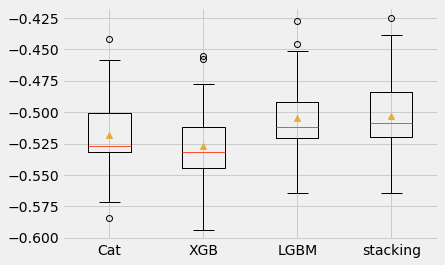

In [40]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [41]:
%%time
# define the base models
level0 = list()
level0.append(('Cat',model_cat))
level0.append(('XGB', model_xgb))
level0.append(('LGBM', model_lgbm))
# define meta learner model
level1 = LinearRegression()
model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
# fit the model on all available data
model.fit(X_train, y_train)
# make predictions
stack_pred = model.predict(X_test)
# Calculate the absolute errors
errors = abs(stack_pred - y_test)

# Mean Absolute Error
from sklearn.metrics import mean_absolute_error
print('MAE:', round(mean_absolute_error(y_test, stack_pred), 2))

# Mean Squared Error
from sklearn.metrics import mean_squared_error
print('MSE:', round(mean_squared_error(y_test, stack_pred), 2))

# Calculate and display root mean squared error (RMSE)
from math import sqrt
rmse = sqrt(mse)
print('RMSE:', round(rmse, 2))

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Learning rate set to 0.049518
0:	learn: 2.4177241	total: 5.37ms	remaining: 5.36s
1:	learn: 2.3240598	total: 10.5ms	remaining: 5.23s
2:	learn: 2.2350901	total: 15.7ms	remaining: 5.21s
3:	learn: 2.1511017	total: 20.8ms	remaining: 5.17s
4:	learn: 2.0756623	total: 25.8ms	remaining: 5.14s
5:	learn: 2.0033161	total: 31.2ms	remaining: 5.16s
6:	learn: 1.9316774	total: 36.2ms	remaining: 5.13s
7:	learn: 1.8677517	total: 41.3ms	remaining: 5.13s
8:	learn: 1.8031977	total: 46.4ms	remaining: 5.11s
9:	learn: 1.7426858	total: 51.5ms	remaining: 5.1s
10:	learn: 1.6871153	total: 56.5ms	remaining: 5.08s
11:	learn: 1.6343557	total: 61.5ms	remaining: 5.07s
12:	learn: 1.5857882	total: 66.5ms	remaining: 5.05s
13:	learn: 1.5386903	total: 71.5ms	remaining: 5.03s
14:	learn: 1.4935402	total: 76.4ms	remaining: 5.02s
15:	learn: 1.4487774	total: 81.4ms	remaining: 5s
16:	learn: 1.4079994	total: 86.4ms	remaining: 4.99s
17:	learn: 1.3707148	total: 91.3ms	remaining: 4.98s
18:	learn: 1.3375224	total: 96.4ms	remaining: 4.

188:	learn: 0.7113202	total: 942ms	remaining: 4.04s
189:	learn: 0.7106404	total: 948ms	remaining: 4.04s
190:	learn: 0.7102910	total: 953ms	remaining: 4.04s
191:	learn: 0.7098795	total: 958ms	remaining: 4.03s
192:	learn: 0.7090371	total: 963ms	remaining: 4.03s
193:	learn: 0.7088855	total: 968ms	remaining: 4.02s
194:	learn: 0.7087438	total: 973ms	remaining: 4.02s
195:	learn: 0.7086043	total: 979ms	remaining: 4.02s
196:	learn: 0.7084607	total: 984ms	remaining: 4.01s
197:	learn: 0.7080323	total: 990ms	remaining: 4.01s
198:	learn: 0.7070852	total: 995ms	remaining: 4s
199:	learn: 0.7069419	total: 1000ms	remaining: 4s
200:	learn: 0.7067992	total: 1s	remaining: 3.99s
201:	learn: 0.7066604	total: 1.01s	remaining: 3.99s
202:	learn: 0.7058884	total: 1.01s	remaining: 3.98s
203:	learn: 0.7057520	total: 1.02s	remaining: 3.98s
204:	learn: 0.7046777	total: 1.02s	remaining: 3.98s
205:	learn: 0.7045497	total: 1.03s	remaining: 3.97s
206:	learn: 0.7043340	total: 1.03s	remaining: 3.96s
207:	learn: 0.703605

381:	learn: 0.6653118	total: 1.9s	remaining: 3.08s
382:	learn: 0.6652358	total: 1.91s	remaining: 3.07s
383:	learn: 0.6649864	total: 1.91s	remaining: 3.07s
384:	learn: 0.6649210	total: 1.92s	remaining: 3.06s
385:	learn: 0.6648459	total: 1.92s	remaining: 3.06s
386:	learn: 0.6647020	total: 1.93s	remaining: 3.05s
387:	learn: 0.6646276	total: 1.93s	remaining: 3.05s
388:	learn: 0.6645529	total: 1.94s	remaining: 3.04s
389:	learn: 0.6644525	total: 1.94s	remaining: 3.04s
390:	learn: 0.6643781	total: 1.95s	remaining: 3.03s
391:	learn: 0.6641450	total: 1.95s	remaining: 3.03s
392:	learn: 0.6635305	total: 1.96s	remaining: 3.02s
393:	learn: 0.6634620	total: 1.96s	remaining: 3.02s
394:	learn: 0.6633876	total: 1.97s	remaining: 3.01s
395:	learn: 0.6629726	total: 1.97s	remaining: 3.01s
396:	learn: 0.6625038	total: 1.98s	remaining: 3s
397:	learn: 0.6623016	total: 1.98s	remaining: 3s
398:	learn: 0.6622319	total: 1.99s	remaining: 2.99s
399:	learn: 0.6621579	total: 1.99s	remaining: 2.98s
400:	learn: 0.66208

574:	learn: 0.6368157	total: 2.85s	remaining: 2.1s
575:	learn: 0.6367463	total: 2.85s	remaining: 2.1s
576:	learn: 0.6365661	total: 2.86s	remaining: 2.1s
577:	learn: 0.6365151	total: 2.86s	remaining: 2.09s
578:	learn: 0.6363324	total: 2.87s	remaining: 2.08s
579:	learn: 0.6358100	total: 2.87s	remaining: 2.08s
580:	learn: 0.6356249	total: 2.88s	remaining: 2.08s
581:	learn: 0.6350914	total: 2.88s	remaining: 2.07s
582:	learn: 0.6347817	total: 2.89s	remaining: 2.07s
583:	learn: 0.6347230	total: 2.89s	remaining: 2.06s
584:	learn: 0.6343576	total: 2.9s	remaining: 2.06s
585:	learn: 0.6343034	total: 2.9s	remaining: 2.05s
586:	learn: 0.6342466	total: 2.91s	remaining: 2.05s
587:	learn: 0.6340019	total: 2.91s	remaining: 2.04s
588:	learn: 0.6337093	total: 2.92s	remaining: 2.04s
589:	learn: 0.6336212	total: 2.92s	remaining: 2.03s
590:	learn: 0.6332422	total: 2.93s	remaining: 2.03s
591:	learn: 0.6331887	total: 2.93s	remaining: 2.02s
592:	learn: 0.6328982	total: 2.94s	remaining: 2.02s
593:	learn: 0.632

768:	learn: 0.6139872	total: 3.81s	remaining: 1.14s
769:	learn: 0.6139453	total: 3.81s	remaining: 1.14s
770:	learn: 0.6138985	total: 3.82s	remaining: 1.13s
771:	learn: 0.6136454	total: 3.82s	remaining: 1.13s
772:	learn: 0.6135981	total: 3.83s	remaining: 1.12s
773:	learn: 0.6132544	total: 3.83s	remaining: 1.12s
774:	learn: 0.6132078	total: 3.84s	remaining: 1.11s
775:	learn: 0.6131605	total: 3.84s	remaining: 1.11s
776:	learn: 0.6131137	total: 3.85s	remaining: 1.1s
777:	learn: 0.6130674	total: 3.85s	remaining: 1.1s
778:	learn: 0.6126586	total: 3.86s	remaining: 1.09s
779:	learn: 0.6123870	total: 3.86s	remaining: 1.09s
780:	learn: 0.6123436	total: 3.87s	remaining: 1.08s
781:	learn: 0.6122973	total: 3.87s	remaining: 1.08s
782:	learn: 0.6122526	total: 3.88s	remaining: 1.07s
783:	learn: 0.6120903	total: 3.88s	remaining: 1.07s
784:	learn: 0.6120203	total: 3.89s	remaining: 1.06s
785:	learn: 0.6118246	total: 3.89s	remaining: 1.06s
786:	learn: 0.6117784	total: 3.9s	remaining: 1.05s
787:	learn: 0.6

963:	learn: 0.5931161	total: 4.77s	remaining: 178ms
964:	learn: 0.5930792	total: 4.78s	remaining: 173ms
965:	learn: 0.5927987	total: 4.78s	remaining: 168ms
966:	learn: 0.5925262	total: 4.79s	remaining: 163ms
967:	learn: 0.5924834	total: 4.79s	remaining: 158ms
968:	learn: 0.5924413	total: 4.79s	remaining: 153ms
969:	learn: 0.5924022	total: 4.8s	remaining: 148ms
970:	learn: 0.5923653	total: 4.8s	remaining: 144ms
971:	learn: 0.5922905	total: 4.81s	remaining: 139ms
972:	learn: 0.5922515	total: 4.82s	remaining: 134ms
973:	learn: 0.5922107	total: 4.82s	remaining: 129ms
974:	learn: 0.5921720	total: 4.82s	remaining: 124ms
975:	learn: 0.5921333	total: 4.83s	remaining: 119ms
976:	learn: 0.5920930	total: 4.83s	remaining: 114ms
977:	learn: 0.5919632	total: 4.84s	remaining: 109ms
978:	learn: 0.5916886	total: 4.84s	remaining: 104ms
979:	learn: 0.5916494	total: 4.85s	remaining: 99ms
980:	learn: 0.5916080	total: 4.85s	remaining: 94ms
981:	learn: 0.5913588	total: 4.86s	remaining: 89.1ms
982:	learn: 0.5

131:	learn: 0.7263608	total: 534ms	remaining: 3.51s
132:	learn: 0.7261555	total: 538ms	remaining: 3.51s
133:	learn: 0.7250204	total: 542ms	remaining: 3.5s
134:	learn: 0.7247171	total: 546ms	remaining: 3.5s
135:	learn: 0.7244601	total: 550ms	remaining: 3.49s
136:	learn: 0.7238308	total: 554ms	remaining: 3.49s
137:	learn: 0.7236647	total: 557ms	remaining: 3.48s
138:	learn: 0.7229699	total: 561ms	remaining: 3.48s
139:	learn: 0.7218804	total: 565ms	remaining: 3.47s
140:	learn: 0.7215121	total: 569ms	remaining: 3.47s
141:	learn: 0.7205707	total: 573ms	remaining: 3.46s
142:	learn: 0.7202993	total: 576ms	remaining: 3.45s
143:	learn: 0.7201853	total: 580ms	remaining: 3.45s
144:	learn: 0.7200068	total: 584ms	remaining: 3.44s
145:	learn: 0.7196614	total: 588ms	remaining: 3.44s
146:	learn: 0.7191186	total: 592ms	remaining: 3.43s
147:	learn: 0.7189351	total: 595ms	remaining: 3.43s
148:	learn: 0.7186396	total: 599ms	remaining: 3.42s
149:	learn: 0.7178909	total: 603ms	remaining: 3.42s
150:	learn: 0.

328:	learn: 0.6648980	total: 1.29s	remaining: 2.64s
329:	learn: 0.6648101	total: 1.3s	remaining: 2.64s
330:	learn: 0.6647288	total: 1.3s	remaining: 2.63s
331:	learn: 0.6646156	total: 1.31s	remaining: 2.63s
332:	learn: 0.6645209	total: 1.31s	remaining: 2.62s
333:	learn: 0.6644351	total: 1.31s	remaining: 2.62s
334:	learn: 0.6641357	total: 1.32s	remaining: 2.62s
335:	learn: 0.6640424	total: 1.32s	remaining: 2.61s
336:	learn: 0.6638126	total: 1.32s	remaining: 2.61s
337:	learn: 0.6637246	total: 1.33s	remaining: 2.6s
338:	learn: 0.6636317	total: 1.33s	remaining: 2.6s
339:	learn: 0.6635390	total: 1.34s	remaining: 2.6s
340:	learn: 0.6633782	total: 1.34s	remaining: 2.59s
341:	learn: 0.6632864	total: 1.34s	remaining: 2.59s
342:	learn: 0.6628279	total: 1.35s	remaining: 2.58s
343:	learn: 0.6627361	total: 1.35s	remaining: 2.58s
344:	learn: 0.6626223	total: 1.35s	remaining: 2.57s
345:	learn: 0.6625358	total: 1.36s	remaining: 2.57s
346:	learn: 0.6624424	total: 1.36s	remaining: 2.57s
347:	learn: 0.662

522:	learn: 0.6356683	total: 2.04s	remaining: 1.86s
523:	learn: 0.6356029	total: 2.04s	remaining: 1.86s
524:	learn: 0.6355372	total: 2.05s	remaining: 1.85s
525:	learn: 0.6354449	total: 2.05s	remaining: 1.85s
526:	learn: 0.6352295	total: 2.06s	remaining: 1.84s
527:	learn: 0.6344944	total: 2.06s	remaining: 1.84s
528:	learn: 0.6344279	total: 2.06s	remaining: 1.84s
529:	learn: 0.6343623	total: 2.07s	remaining: 1.83s
530:	learn: 0.6342694	total: 2.07s	remaining: 1.83s
531:	learn: 0.6342041	total: 2.08s	remaining: 1.82s
532:	learn: 0.6341145	total: 2.08s	remaining: 1.82s
533:	learn: 0.6340555	total: 2.08s	remaining: 1.82s
534:	learn: 0.6337756	total: 2.09s	remaining: 1.81s
535:	learn: 0.6333901	total: 2.09s	remaining: 1.81s
536:	learn: 0.6332995	total: 2.09s	remaining: 1.8s
537:	learn: 0.6332343	total: 2.1s	remaining: 1.8s
538:	learn: 0.6331693	total: 2.1s	remaining: 1.8s
539:	learn: 0.6331091	total: 2.1s	remaining: 1.79s
540:	learn: 0.6326859	total: 2.11s	remaining: 1.79s
541:	learn: 0.6323

716:	learn: 0.6110687	total: 2.79s	remaining: 1.1s
717:	learn: 0.6110168	total: 2.79s	remaining: 1.09s
718:	learn: 0.6109648	total: 2.79s	remaining: 1.09s
719:	learn: 0.6109135	total: 2.8s	remaining: 1.09s
720:	learn: 0.6108243	total: 2.8s	remaining: 1.08s
721:	learn: 0.6107749	total: 2.81s	remaining: 1.08s
722:	learn: 0.6107282	total: 2.81s	remaining: 1.08s
723:	learn: 0.6106777	total: 2.81s	remaining: 1.07s
724:	learn: 0.6105136	total: 2.82s	remaining: 1.07s
725:	learn: 0.6104455	total: 2.82s	remaining: 1.06s
726:	learn: 0.6102679	total: 2.82s	remaining: 1.06s
727:	learn: 0.6102176	total: 2.83s	remaining: 1.06s
728:	learn: 0.6101661	total: 2.83s	remaining: 1.05s
729:	learn: 0.6100077	total: 2.84s	remaining: 1.05s
730:	learn: 0.6099573	total: 2.84s	remaining: 1.04s
731:	learn: 0.6097490	total: 2.84s	remaining: 1.04s
732:	learn: 0.6096977	total: 2.85s	remaining: 1.04s
733:	learn: 0.6096466	total: 2.85s	remaining: 1.03s
734:	learn: 0.6095997	total: 2.85s	remaining: 1.03s
735:	learn: 0.6

911:	learn: 0.5871855	total: 3.54s	remaining: 341ms
912:	learn: 0.5871431	total: 3.54s	remaining: 337ms
913:	learn: 0.5870723	total: 3.54s	remaining: 333ms
914:	learn: 0.5869590	total: 3.55s	remaining: 330ms
915:	learn: 0.5866614	total: 3.55s	remaining: 326ms
916:	learn: 0.5863859	total: 3.56s	remaining: 322ms
917:	learn: 0.5862382	total: 3.56s	remaining: 318ms
918:	learn: 0.5861956	total: 3.56s	remaining: 314ms
919:	learn: 0.5861016	total: 3.57s	remaining: 310ms
920:	learn: 0.5860642	total: 3.57s	remaining: 306ms
921:	learn: 0.5860248	total: 3.57s	remaining: 302ms
922:	learn: 0.5859850	total: 3.58s	remaining: 299ms
923:	learn: 0.5859142	total: 3.58s	remaining: 295ms
924:	learn: 0.5858719	total: 3.58s	remaining: 291ms
925:	learn: 0.5858034	total: 3.59s	remaining: 287ms
926:	learn: 0.5857613	total: 3.59s	remaining: 283ms
927:	learn: 0.5852520	total: 3.6s	remaining: 279ms
928:	learn: 0.5852098	total: 3.6s	remaining: 275ms
929:	learn: 0.5851677	total: 3.6s	remaining: 271ms
930:	learn: 0.5

91:	learn: 0.7321930	total: 377ms	remaining: 3.72s
92:	learn: 0.7312204	total: 382ms	remaining: 3.72s
93:	learn: 0.7300023	total: 386ms	remaining: 3.72s
94:	learn: 0.7292437	total: 390ms	remaining: 3.71s
95:	learn: 0.7278655	total: 394ms	remaining: 3.71s
96:	learn: 0.7268612	total: 398ms	remaining: 3.7s
97:	learn: 0.7258913	total: 402ms	remaining: 3.7s
98:	learn: 0.7251521	total: 406ms	remaining: 3.69s
99:	learn: 0.7242639	total: 410ms	remaining: 3.69s
100:	learn: 0.7235895	total: 414ms	remaining: 3.68s
101:	learn: 0.7226138	total: 418ms	remaining: 3.68s
102:	learn: 0.7213760	total: 422ms	remaining: 3.67s
103:	learn: 0.7205538	total: 426ms	remaining: 3.67s
104:	learn: 0.7197639	total: 430ms	remaining: 3.67s
105:	learn: 0.7190937	total: 434ms	remaining: 3.66s
106:	learn: 0.7186648	total: 438ms	remaining: 3.66s
107:	learn: 0.7177986	total: 442ms	remaining: 3.65s
108:	learn: 0.7169903	total: 446ms	remaining: 3.65s
109:	learn: 0.7167743	total: 450ms	remaining: 3.64s
110:	learn: 0.7161206	t

274:	learn: 0.6648908	total: 1.12s	remaining: 2.96s
275:	learn: 0.6647042	total: 1.13s	remaining: 2.96s
276:	learn: 0.6643823	total: 1.13s	remaining: 2.95s
277:	learn: 0.6642703	total: 1.14s	remaining: 2.95s
278:	learn: 0.6633412	total: 1.14s	remaining: 2.94s
279:	learn: 0.6627641	total: 1.14s	remaining: 2.94s
280:	learn: 0.6625148	total: 1.15s	remaining: 2.94s
281:	learn: 0.6624026	total: 1.15s	remaining: 2.93s
282:	learn: 0.6622917	total: 1.16s	remaining: 2.93s
283:	learn: 0.6618315	total: 1.16s	remaining: 2.92s
284:	learn: 0.6617149	total: 1.16s	remaining: 2.92s
285:	learn: 0.6616053	total: 1.17s	remaining: 2.92s
286:	learn: 0.6614908	total: 1.17s	remaining: 2.91s
287:	learn: 0.6613405	total: 1.18s	remaining: 2.91s
288:	learn: 0.6612275	total: 1.18s	remaining: 2.9s
289:	learn: 0.6611163	total: 1.18s	remaining: 2.9s
290:	learn: 0.6610059	total: 1.19s	remaining: 2.89s
291:	learn: 0.6608971	total: 1.19s	remaining: 2.89s
292:	learn: 0.6607897	total: 1.2s	remaining: 2.89s
293:	learn: 0.6

457:	learn: 0.6322858	total: 1.88s	remaining: 2.23s
458:	learn: 0.6321702	total: 1.88s	remaining: 2.22s
459:	learn: 0.6318765	total: 1.89s	remaining: 2.22s
460:	learn: 0.6318110	total: 1.89s	remaining: 2.21s
461:	learn: 0.6317385	total: 1.9s	remaining: 2.21s
462:	learn: 0.6316705	total: 1.9s	remaining: 2.2s
463:	learn: 0.6315999	total: 1.9s	remaining: 2.2s
464:	learn: 0.6315077	total: 1.91s	remaining: 2.2s
465:	learn: 0.6311067	total: 1.91s	remaining: 2.19s
466:	learn: 0.6310376	total: 1.92s	remaining: 2.19s
467:	learn: 0.6309651	total: 1.92s	remaining: 2.18s
468:	learn: 0.6308977	total: 1.93s	remaining: 2.18s
469:	learn: 0.6308262	total: 1.93s	remaining: 2.17s
470:	learn: 0.6302306	total: 1.93s	remaining: 2.17s
471:	learn: 0.6299402	total: 1.94s	remaining: 2.17s
472:	learn: 0.6298734	total: 1.94s	remaining: 2.16s
473:	learn: 0.6293627	total: 1.95s	remaining: 2.16s
474:	learn: 0.6293000	total: 1.95s	remaining: 2.15s
475:	learn: 0.6292358	total: 1.95s	remaining: 2.15s
476:	learn: 0.6291

644:	learn: 0.6086245	total: 2.63s	remaining: 1.45s
645:	learn: 0.6085680	total: 2.63s	remaining: 1.44s
646:	learn: 0.6085112	total: 2.64s	remaining: 1.44s
647:	learn: 0.6084540	total: 2.64s	remaining: 1.43s
648:	learn: 0.6084041	total: 2.64s	remaining: 1.43s
649:	learn: 0.6083520	total: 2.65s	remaining: 1.43s
650:	learn: 0.6082979	total: 2.65s	remaining: 1.42s
651:	learn: 0.6082421	total: 2.66s	remaining: 1.42s
652:	learn: 0.6081897	total: 2.66s	remaining: 1.41s
653:	learn: 0.6081383	total: 2.66s	remaining: 1.41s
654:	learn: 0.6080828	total: 2.67s	remaining: 1.41s
655:	learn: 0.6076524	total: 2.67s	remaining: 1.4s
656:	learn: 0.6075969	total: 2.67s	remaining: 1.4s
657:	learn: 0.6070754	total: 2.68s	remaining: 1.39s
658:	learn: 0.6069847	total: 2.69s	remaining: 1.39s
659:	learn: 0.6067826	total: 2.69s	remaining: 1.39s
660:	learn: 0.6066945	total: 2.69s	remaining: 1.38s
661:	learn: 0.6066390	total: 2.7s	remaining: 1.38s
662:	learn: 0.6065687	total: 2.7s	remaining: 1.37s
663:	learn: 0.60

835:	learn: 0.5885313	total: 3.39s	remaining: 665ms
836:	learn: 0.5884854	total: 3.4s	remaining: 661ms
837:	learn: 0.5884428	total: 3.4s	remaining: 657ms
838:	learn: 0.5884005	total: 3.4s	remaining: 653ms
839:	learn: 0.5880244	total: 3.41s	remaining: 649ms
840:	learn: 0.5879781	total: 3.41s	remaining: 645ms
841:	learn: 0.5877997	total: 3.42s	remaining: 641ms
842:	learn: 0.5877538	total: 3.42s	remaining: 637ms
843:	learn: 0.5877118	total: 3.42s	remaining: 633ms
844:	learn: 0.5876699	total: 3.43s	remaining: 629ms
845:	learn: 0.5876264	total: 3.43s	remaining: 625ms
846:	learn: 0.5875835	total: 3.44s	remaining: 621ms
847:	learn: 0.5875227	total: 3.44s	remaining: 617ms
848:	learn: 0.5874785	total: 3.44s	remaining: 612ms
849:	learn: 0.5871242	total: 3.45s	remaining: 608ms
850:	learn: 0.5870789	total: 3.45s	remaining: 604ms
851:	learn: 0.5870333	total: 3.45s	remaining: 600ms
852:	learn: 0.5866320	total: 3.46s	remaining: 596ms
853:	learn: 0.5864931	total: 3.46s	remaining: 592ms
854:	learn: 0.5

Learning rate set to 0.047804
0:	learn: 2.4445868	total: 4.35ms	remaining: 4.34s
1:	learn: 2.3587991	total: 8.48ms	remaining: 4.23s
2:	learn: 2.2782166	total: 12.5ms	remaining: 4.15s
3:	learn: 2.1950881	total: 16.5ms	remaining: 4.1s
4:	learn: 2.1197657	total: 20.4ms	remaining: 4.07s
5:	learn: 2.0522023	total: 24.5ms	remaining: 4.06s
6:	learn: 1.9833286	total: 28.5ms	remaining: 4.04s
7:	learn: 1.9183896	total: 32.6ms	remaining: 4.05s
8:	learn: 1.8582277	total: 36.7ms	remaining: 4.04s
9:	learn: 1.7988562	total: 40.7ms	remaining: 4.03s
10:	learn: 1.7444935	total: 44.7ms	remaining: 4.01s
11:	learn: 1.6942470	total: 48.6ms	remaining: 4s
12:	learn: 1.6429245	total: 52.7ms	remaining: 4s
13:	learn: 1.5958229	total: 56.8ms	remaining: 4s
14:	learn: 1.5507504	total: 60.7ms	remaining: 3.99s
15:	learn: 1.5060565	total: 64.7ms	remaining: 3.98s
16:	learn: 1.4647182	total: 68.6ms	remaining: 3.97s
17:	learn: 1.4268937	total: 72.7ms	remaining: 3.97s
18:	learn: 1.3911392	total: 77ms	remaining: 3.97s
19:	

192:	learn: 0.7069046	total: 742ms	remaining: 3.1s
193:	learn: 0.7060580	total: 746ms	remaining: 3.1s
194:	learn: 0.7058909	total: 750ms	remaining: 3.09s
195:	learn: 0.7057179	total: 753ms	remaining: 3.09s
196:	learn: 0.7050917	total: 757ms	remaining: 3.09s
197:	learn: 0.7049204	total: 761ms	remaining: 3.08s
198:	learn: 0.7047729	total: 765ms	remaining: 3.08s
199:	learn: 0.7046069	total: 769ms	remaining: 3.07s
200:	learn: 0.7044510	total: 772ms	remaining: 3.07s
201:	learn: 0.7038088	total: 776ms	remaining: 3.07s
202:	learn: 0.7036554	total: 780ms	remaining: 3.06s
203:	learn: 0.7034734	total: 784ms	remaining: 3.06s
204:	learn: 0.7032562	total: 788ms	remaining: 3.05s
205:	learn: 0.7030920	total: 791ms	remaining: 3.05s
206:	learn: 0.7029357	total: 795ms	remaining: 3.05s
207:	learn: 0.7025327	total: 800ms	remaining: 3.04s
208:	learn: 0.7023835	total: 803ms	remaining: 3.04s
209:	learn: 0.7017612	total: 807ms	remaining: 3.04s
210:	learn: 0.7006534	total: 811ms	remaining: 3.03s
211:	learn: 0.

397:	learn: 0.6583508	total: 1.5s	remaining: 2.26s
398:	learn: 0.6582692	total: 1.5s	remaining: 2.26s
399:	learn: 0.6581823	total: 1.5s	remaining: 2.25s
400:	learn: 0.6580645	total: 1.51s	remaining: 2.25s
401:	learn: 0.6579787	total: 1.51s	remaining: 2.25s
402:	learn: 0.6577603	total: 1.51s	remaining: 2.24s
403:	learn: 0.6575841	total: 1.52s	remaining: 2.24s
404:	learn: 0.6574984	total: 1.52s	remaining: 2.23s
405:	learn: 0.6569782	total: 1.52s	remaining: 2.23s
406:	learn: 0.6566526	total: 1.53s	remaining: 2.23s
407:	learn: 0.6565715	total: 1.53s	remaining: 2.22s
408:	learn: 0.6564439	total: 1.53s	remaining: 2.22s
409:	learn: 0.6563582	total: 1.54s	remaining: 2.21s
410:	learn: 0.6558974	total: 1.54s	remaining: 2.21s
411:	learn: 0.6558118	total: 1.55s	remaining: 2.21s
412:	learn: 0.6554678	total: 1.55s	remaining: 2.2s
413:	learn: 0.6553827	total: 1.55s	remaining: 2.2s
414:	learn: 0.6551740	total: 1.56s	remaining: 2.19s
415:	learn: 0.6550939	total: 1.56s	remaining: 2.19s
416:	learn: 0.655

605:	learn: 0.6233320	total: 2.25s	remaining: 1.47s
606:	learn: 0.6229995	total: 2.26s	remaining: 1.46s
607:	learn: 0.6229363	total: 2.26s	remaining: 1.46s
608:	learn: 0.6227814	total: 2.27s	remaining: 1.46s
609:	learn: 0.6227183	total: 2.27s	remaining: 1.45s
610:	learn: 0.6226555	total: 2.27s	remaining: 1.45s
611:	learn: 0.6222659	total: 2.28s	remaining: 1.44s
612:	learn: 0.6221787	total: 2.28s	remaining: 1.44s
613:	learn: 0.6221224	total: 2.28s	remaining: 1.44s
614:	learn: 0.6219424	total: 2.29s	remaining: 1.43s
615:	learn: 0.6218762	total: 2.29s	remaining: 1.43s
616:	learn: 0.6217852	total: 2.29s	remaining: 1.43s
617:	learn: 0.6216199	total: 2.3s	remaining: 1.42s
618:	learn: 0.6210181	total: 2.3s	remaining: 1.42s
619:	learn: 0.6209595	total: 2.31s	remaining: 1.41s
620:	learn: 0.6208143	total: 2.31s	remaining: 1.41s
621:	learn: 0.6204923	total: 2.31s	remaining: 1.41s
622:	learn: 0.6204268	total: 2.32s	remaining: 1.4s
623:	learn: 0.6203640	total: 2.32s	remaining: 1.4s
624:	learn: 0.62

809:	learn: 0.5939637	total: 3s	remaining: 704ms
810:	learn: 0.5939124	total: 3s	remaining: 701ms
811:	learn: 0.5938611	total: 3.01s	remaining: 697ms
812:	learn: 0.5938128	total: 3.01s	remaining: 693ms
813:	learn: 0.5937284	total: 3.02s	remaining: 689ms
814:	learn: 0.5935118	total: 3.02s	remaining: 686ms
815:	learn: 0.5934607	total: 3.02s	remaining: 682ms
816:	learn: 0.5934097	total: 3.03s	remaining: 678ms
817:	learn: 0.5933616	total: 3.03s	remaining: 675ms
818:	learn: 0.5933108	total: 3.04s	remaining: 671ms
819:	learn: 0.5932632	total: 3.04s	remaining: 667ms
820:	learn: 0.5932127	total: 3.04s	remaining: 663ms
821:	learn: 0.5931456	total: 3.05s	remaining: 660ms
822:	learn: 0.5930952	total: 3.05s	remaining: 656ms
823:	learn: 0.5929794	total: 3.05s	remaining: 652ms
824:	learn: 0.5929290	total: 3.06s	remaining: 648ms
825:	learn: 0.5928788	total: 3.06s	remaining: 645ms
826:	learn: 0.5925987	total: 3.06s	remaining: 641ms
827:	learn: 0.5925485	total: 3.07s	remaining: 637ms
828:	learn: 0.5924

Learning rate set to 0.047804
0:	learn: 2.4262544	total: 4.3ms	remaining: 4.3s
1:	learn: 2.3401292	total: 8.34ms	remaining: 4.16s
2:	learn: 2.2593292	total: 12.2ms	remaining: 4.05s
3:	learn: 2.1839242	total: 16.2ms	remaining: 4.03s
4:	learn: 2.1094922	total: 20ms	remaining: 3.98s
5:	learn: 2.0427595	total: 23.8ms	remaining: 3.94s
6:	learn: 1.9735162	total: 27.6ms	remaining: 3.92s
7:	learn: 1.9091402	total: 31.5ms	remaining: 3.91s
8:	learn: 1.8485642	total: 35.5ms	remaining: 3.91s
9:	learn: 1.7906457	total: 39.5ms	remaining: 3.91s
10:	learn: 1.7354769	total: 43.4ms	remaining: 3.9s
11:	learn: 1.6799261	total: 47.3ms	remaining: 3.89s
12:	learn: 1.6351366	total: 51.1ms	remaining: 3.88s
13:	learn: 1.5911829	total: 55.4ms	remaining: 3.9s
14:	learn: 1.5454547	total: 59.3ms	remaining: 3.89s
15:	learn: 1.5034887	total: 63.3ms	remaining: 3.89s
16:	learn: 1.4637566	total: 67.1ms	remaining: 3.88s
17:	learn: 1.4237948	total: 70.9ms	remaining: 3.87s
18:	learn: 1.3869353	total: 74.5ms	remaining: 3.85

194:	learn: 0.7238027	total: 738ms	remaining: 3.05s
195:	learn: 0.7233847	total: 742ms	remaining: 3.04s
196:	learn: 0.7232017	total: 746ms	remaining: 3.04s
197:	learn: 0.7229221	total: 750ms	remaining: 3.04s
198:	learn: 0.7227505	total: 754ms	remaining: 3.03s
199:	learn: 0.7225988	total: 757ms	remaining: 3.03s
200:	learn: 0.7224306	total: 761ms	remaining: 3.03s
201:	learn: 0.7222628	total: 765ms	remaining: 3.02s
202:	learn: 0.7220966	total: 769ms	remaining: 3.02s
203:	learn: 0.7219483	total: 773ms	remaining: 3.02s
204:	learn: 0.7211142	total: 777ms	remaining: 3.01s
205:	learn: 0.7207726	total: 781ms	remaining: 3.01s
206:	learn: 0.7205214	total: 784ms	remaining: 3s
207:	learn: 0.7203681	total: 788ms	remaining: 3s
208:	learn: 0.7194651	total: 792ms	remaining: 3s
209:	learn: 0.7190020	total: 796ms	remaining: 2.99s
210:	learn: 0.7181073	total: 800ms	remaining: 2.99s
211:	learn: 0.7179553	total: 804ms	remaining: 2.99s
212:	learn: 0.7177977	total: 808ms	remaining: 2.98s
213:	learn: 0.7176482

386:	learn: 0.6753014	total: 1.49s	remaining: 2.36s
387:	learn: 0.6748831	total: 1.49s	remaining: 2.36s
388:	learn: 0.6747994	total: 1.5s	remaining: 2.35s
389:	learn: 0.6740835	total: 1.5s	remaining: 2.35s
390:	learn: 0.6739993	total: 1.5s	remaining: 2.34s
391:	learn: 0.6739158	total: 1.51s	remaining: 2.34s
392:	learn: 0.6738393	total: 1.51s	remaining: 2.34s
393:	learn: 0.6737570	total: 1.52s	remaining: 2.33s
394:	learn: 0.6735941	total: 1.52s	remaining: 2.33s
395:	learn: 0.6735092	total: 1.52s	remaining: 2.32s
396:	learn: 0.6733956	total: 1.53s	remaining: 2.32s
397:	learn: 0.6733159	total: 1.53s	remaining: 2.31s
398:	learn: 0.6730462	total: 1.53s	remaining: 2.31s
399:	learn: 0.6729648	total: 1.54s	remaining: 2.31s
400:	learn: 0.6727866	total: 1.54s	remaining: 2.3s
401:	learn: 0.6726221	total: 1.54s	remaining: 2.3s
402:	learn: 0.6725480	total: 1.55s	remaining: 2.29s
403:	learn: 0.6718570	total: 1.55s	remaining: 2.29s
404:	learn: 0.6717499	total: 1.56s	remaining: 2.29s
405:	learn: 0.671

587:	learn: 0.6404390	total: 2.25s	remaining: 1.58s
588:	learn: 0.6403822	total: 2.26s	remaining: 1.57s
589:	learn: 0.6403297	total: 2.26s	remaining: 1.57s
590:	learn: 0.6402429	total: 2.26s	remaining: 1.57s
591:	learn: 0.6401821	total: 2.27s	remaining: 1.56s
592:	learn: 0.6400780	total: 2.27s	remaining: 1.56s
593:	learn: 0.6400219	total: 2.27s	remaining: 1.55s
594:	learn: 0.6399618	total: 2.28s	remaining: 1.55s
595:	learn: 0.6399025	total: 2.28s	remaining: 1.55s
596:	learn: 0.6398522	total: 2.29s	remaining: 1.54s
597:	learn: 0.6398067	total: 2.29s	remaining: 1.54s
598:	learn: 0.6397511	total: 2.29s	remaining: 1.54s
599:	learn: 0.6396963	total: 2.3s	remaining: 1.53s
600:	learn: 0.6392345	total: 2.3s	remaining: 1.53s
601:	learn: 0.6391827	total: 2.31s	remaining: 1.52s
602:	learn: 0.6391272	total: 2.31s	remaining: 1.52s
603:	learn: 0.6390738	total: 2.31s	remaining: 1.52s
604:	learn: 0.6389431	total: 2.32s	remaining: 1.51s
605:	learn: 0.6388903	total: 2.32s	remaining: 1.51s
606:	learn: 0.

783:	learn: 0.6176115	total: 3.02s	remaining: 831ms
784:	learn: 0.6175625	total: 3.02s	remaining: 828ms
785:	learn: 0.6174063	total: 3.02s	remaining: 824ms
786:	learn: 0.6173576	total: 3.03s	remaining: 820ms
787:	learn: 0.6171163	total: 3.03s	remaining: 816ms
788:	learn: 0.6170670	total: 3.04s	remaining: 812ms
789:	learn: 0.6170127	total: 3.04s	remaining: 808ms
790:	learn: 0.6169657	total: 3.04s	remaining: 805ms
791:	learn: 0.6169220	total: 3.05s	remaining: 801ms
792:	learn: 0.6168512	total: 3.05s	remaining: 797ms
793:	learn: 0.6168040	total: 3.06s	remaining: 793ms
794:	learn: 0.6167568	total: 3.06s	remaining: 789ms
795:	learn: 0.6167093	total: 3.06s	remaining: 785ms
796:	learn: 0.6166643	total: 3.07s	remaining: 782ms
797:	learn: 0.6166158	total: 3.07s	remaining: 778ms
798:	learn: 0.6165729	total: 3.08s	remaining: 774ms
799:	learn: 0.6165266	total: 3.08s	remaining: 770ms
800:	learn: 0.6164803	total: 3.08s	remaining: 766ms
801:	learn: 0.6164094	total: 3.09s	remaining: 762ms
802:	learn: 

979:	learn: 0.5956413	total: 3.77s	remaining: 77ms
980:	learn: 0.5955997	total: 3.78s	remaining: 73.1ms
981:	learn: 0.5955630	total: 3.78s	remaining: 69.3ms
982:	learn: 0.5954022	total: 3.78s	remaining: 65.4ms
983:	learn: 0.5953610	total: 3.79s	remaining: 61.6ms
984:	learn: 0.5953121	total: 3.79s	remaining: 57.7ms
985:	learn: 0.5951748	total: 3.79s	remaining: 53.9ms
986:	learn: 0.5947187	total: 3.8s	remaining: 50ms
987:	learn: 0.5946800	total: 3.8s	remaining: 46.2ms
988:	learn: 0.5942018	total: 3.81s	remaining: 42.4ms
989:	learn: 0.5941648	total: 3.81s	remaining: 38.5ms
990:	learn: 0.5941090	total: 3.81s	remaining: 34.7ms
991:	learn: 0.5936446	total: 3.82s	remaining: 30.8ms
992:	learn: 0.5936033	total: 3.82s	remaining: 27ms
993:	learn: 0.5935623	total: 3.83s	remaining: 23.1ms
994:	learn: 0.5931723	total: 3.83s	remaining: 19.3ms
995:	learn: 0.5931311	total: 3.83s	remaining: 15.4ms
996:	learn: 0.5930945	total: 3.84s	remaining: 11.6ms
997:	learn: 0.5930536	total: 3.84s	remaining: 7.7ms
99

145:	learn: 0.7160452	total: 557ms	remaining: 3.26s
146:	learn: 0.7159122	total: 561ms	remaining: 3.26s
147:	learn: 0.7153343	total: 565ms	remaining: 3.25s
148:	learn: 0.7147922	total: 569ms	remaining: 3.25s
149:	learn: 0.7143928	total: 573ms	remaining: 3.25s
150:	learn: 0.7142610	total: 577ms	remaining: 3.24s
151:	learn: 0.7136854	total: 581ms	remaining: 3.24s
152:	learn: 0.7128211	total: 585ms	remaining: 3.24s
153:	learn: 0.7124873	total: 589ms	remaining: 3.23s
154:	learn: 0.7122820	total: 593ms	remaining: 3.23s
155:	learn: 0.7109817	total: 597ms	remaining: 3.23s
156:	learn: 0.7108562	total: 600ms	remaining: 3.22s
157:	learn: 0.7105175	total: 604ms	remaining: 3.22s
158:	learn: 0.7103559	total: 608ms	remaining: 3.22s
159:	learn: 0.7102028	total: 612ms	remaining: 3.21s
160:	learn: 0.7094628	total: 616ms	remaining: 3.21s
161:	learn: 0.7090459	total: 620ms	remaining: 3.21s
162:	learn: 0.7089236	total: 624ms	remaining: 3.2s
163:	learn: 0.7082813	total: 628ms	remaining: 3.2s
164:	learn: 0.

341:	learn: 0.6618193	total: 1.31s	remaining: 2.53s
342:	learn: 0.6617346	total: 1.32s	remaining: 2.53s
343:	learn: 0.6616485	total: 1.32s	remaining: 2.52s
344:	learn: 0.6615641	total: 1.33s	remaining: 2.52s
345:	learn: 0.6614818	total: 1.33s	remaining: 2.52s
346:	learn: 0.6613972	total: 1.33s	remaining: 2.51s
347:	learn: 0.6608795	total: 1.34s	remaining: 2.51s
348:	learn: 0.6608006	total: 1.34s	remaining: 2.5s
349:	learn: 0.6607183	total: 1.35s	remaining: 2.5s
350:	learn: 0.6606329	total: 1.35s	remaining: 2.5s
351:	learn: 0.6605537	total: 1.35s	remaining: 2.49s
352:	learn: 0.6604705	total: 1.36s	remaining: 2.49s
353:	learn: 0.6599552	total: 1.36s	remaining: 2.48s
354:	learn: 0.6598782	total: 1.36s	remaining: 2.48s
355:	learn: 0.6598000	total: 1.37s	remaining: 2.48s
356:	learn: 0.6596024	total: 1.37s	remaining: 2.47s
357:	learn: 0.6595223	total: 1.38s	remaining: 2.47s
358:	learn: 0.6594449	total: 1.38s	remaining: 2.46s
359:	learn: 0.6593702	total: 1.38s	remaining: 2.46s
360:	learn: 0.6

538:	learn: 0.6249201	total: 2.07s	remaining: 1.77s
539:	learn: 0.6248605	total: 2.08s	remaining: 1.77s
540:	learn: 0.6247997	total: 2.08s	remaining: 1.76s
541:	learn: 0.6245587	total: 2.08s	remaining: 1.76s
542:	learn: 0.6244956	total: 2.09s	remaining: 1.76s
543:	learn: 0.6244214	total: 2.09s	remaining: 1.75s
544:	learn: 0.6243585	total: 2.1s	remaining: 1.75s
545:	learn: 0.6242994	total: 2.1s	remaining: 1.75s
546:	learn: 0.6239141	total: 2.1s	remaining: 1.74s
547:	learn: 0.6238558	total: 2.11s	remaining: 1.74s
548:	learn: 0.6237172	total: 2.11s	remaining: 1.73s
549:	learn: 0.6233353	total: 2.12s	remaining: 1.73s
550:	learn: 0.6229963	total: 2.12s	remaining: 1.73s
551:	learn: 0.6229022	total: 2.12s	remaining: 1.72s
552:	learn: 0.6217751	total: 2.13s	remaining: 1.72s
553:	learn: 0.6217122	total: 2.13s	remaining: 1.72s
554:	learn: 0.6216548	total: 2.13s	remaining: 1.71s
555:	learn: 0.6215970	total: 2.14s	remaining: 1.71s
556:	learn: 0.6215392	total: 2.14s	remaining: 1.7s
557:	learn: 0.62

735:	learn: 0.5972088	total: 2.83s	remaining: 1.01s
736:	learn: 0.5970821	total: 2.83s	remaining: 1.01s
737:	learn: 0.5967872	total: 2.84s	remaining: 1.01s
738:	learn: 0.5967080	total: 2.84s	remaining: 1s
739:	learn: 0.5966612	total: 2.85s	remaining: 1s
740:	learn: 0.5966166	total: 2.85s	remaining: 996ms
741:	learn: 0.5965669	total: 2.85s	remaining: 992ms
742:	learn: 0.5965205	total: 2.86s	remaining: 989ms
743:	learn: 0.5964710	total: 2.86s	remaining: 985ms
744:	learn: 0.5964246	total: 2.87s	remaining: 981ms
745:	learn: 0.5963787	total: 2.87s	remaining: 977ms
746:	learn: 0.5959625	total: 2.87s	remaining: 973ms
747:	learn: 0.5959130	total: 2.88s	remaining: 969ms
748:	learn: 0.5949567	total: 2.88s	remaining: 965ms
749:	learn: 0.5948727	total: 2.88s	remaining: 962ms
750:	learn: 0.5948233	total: 2.89s	remaining: 958ms
751:	learn: 0.5947739	total: 2.89s	remaining: 954ms
752:	learn: 0.5947249	total: 2.9s	remaining: 950ms
753:	learn: 0.5946756	total: 2.9s	remaining: 946ms
754:	learn: 0.594626

931:	learn: 0.5729857	total: 3.59s	remaining: 262ms
932:	learn: 0.5729449	total: 3.59s	remaining: 258ms
933:	learn: 0.5729075	total: 3.59s	remaining: 254ms
934:	learn: 0.5728669	total: 3.6s	remaining: 250ms
935:	learn: 0.5727406	total: 3.6s	remaining: 246ms
936:	learn: 0.5725244	total: 3.6s	remaining: 242ms
937:	learn: 0.5724838	total: 3.61s	remaining: 239ms
938:	learn: 0.5724452	total: 3.61s	remaining: 235ms
939:	learn: 0.5724047	total: 3.62s	remaining: 231ms
940:	learn: 0.5718686	total: 3.62s	remaining: 227ms
941:	learn: 0.5718277	total: 3.62s	remaining: 223ms
942:	learn: 0.5717872	total: 3.63s	remaining: 219ms
943:	learn: 0.5714973	total: 3.63s	remaining: 215ms
944:	learn: 0.5714569	total: 3.64s	remaining: 212ms
945:	learn: 0.5713986	total: 3.64s	remaining: 208ms
946:	learn: 0.5708489	total: 3.64s	remaining: 204ms
947:	learn: 0.5708085	total: 3.65s	remaining: 200ms
948:	learn: 0.5707681	total: 3.65s	remaining: 196ms
949:	learn: 0.5707279	total: 3.65s	remaining: 192ms
950:	learn: 0.5